
# Indice

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The challenge is to find a set of rules to fill a new column called "prediction", similar to the contents of the Survived column. Important: This set of rules cannot use a Survived column, just like other information.



In [1]:
#Importação das bibliotécas 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Leitura dos dados 
titanic = pd.read_csv('titanic.data')
titanicWithNaN = pd.read_csv('titanic.data')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



----
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<h1>
Start of data mold

In [3]:
#Dados retornados como nulos
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Ajustes em dados que podem ocasionar em problemas ou erros no código

  #Idade nulas agora comtém valores utilizáveis 
titanic.fillna({'Age':titanic.Age.mean()} , inplace=True)

titanicWithNaN.fillna({'Age': -1} , inplace=True)
titanicWithNaN.fillna({'Cabin': -1} , inplace=True)

  #Sexo passa a conter valor booleano
titanic['Sex'][titanic['Sex'] == 'male'] = 0
titanic['Sex'][titanic['Sex'] == 'female'] = 1
titanic['Sex'] = pd.to_numeric(titanic['Sex'])

titanicWithNaN['Sex'][titanicWithNaN['Sex'] == 'male'] = 0
titanicWithNaN['Sex'][titanicWithNaN['Sex'] == 'female'] = 1
titanicWithNaN['Sex'] = pd.to_numeric(titanicWithNaN['Sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


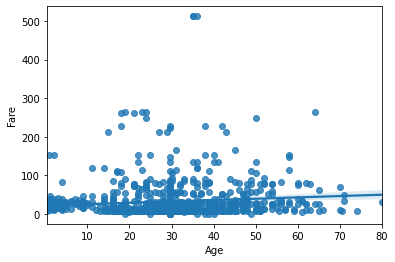

In [5]:
sns.regplot(x=titanic['Age'], y=titanic['Fare'])

-------
<br>

Analysis of survivors and non-survivors using ages



It is notable that the ages with the highest number of occurrences are between **15** and **40** years

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


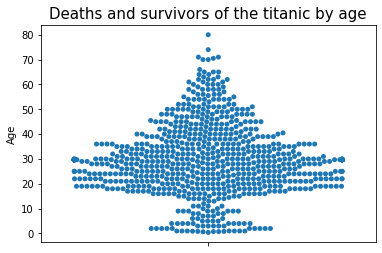

In [6]:

plt.title("Deaths and survivors of the titanic by age", size=15)

sns.swarmplot(y=titanic['Age'])

<br>

Analyzing the number of people per class between the ages of 15 and 38, the result of both survivors and non-survivors is that in both cases the largest number of cases is found in the results in ** Third class ** impossible to double the others.



Survived
Counter({3: 388, 1: 129, 2: 128})



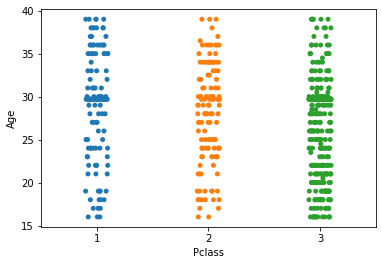

In [7]:
from collections import Counter

titanicClassAge = (titanic['Age'] > 15) & (titanic['Age'] < 40)
titanicClassAge = titanic[titanicClassAge]

print('Survived')
print(Counter(titanicClassAge['Pclass']))
print()
sns.stripplot(y=titanicClassAge['Age'], x=titanicClassAge['Pclass'], data=titanicClassAge)


-----
<br>

Analyzing the number of people per class between the ages of 15 and 38, the result of both survivors and non-survivors is that in both cases the largest number of cases were reported to be on boarding S

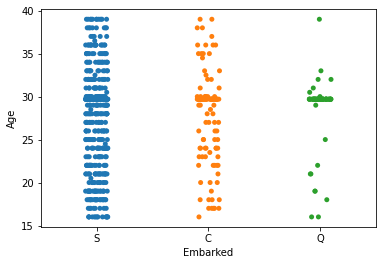

In [8]:
sns.stripplot(y=titanicClassAge['Age'], x=titanicClassAge['Embarked'], data=titanicClassAge)

<br>

In this case, men died much more than women independent of the class and, consequently, were the ones who least survived.

In [9]:
print("all the titanic people")
print("Male = 0 and Female = 1")

titanic['Sex'].value_counts()

all the titanic people
Male = 0 and Female = 1


0    577
1    314
Name: Sex, dtype: int64

In [10]:
print("all the people of the titanic taking into account the age (15 to 40 years)")
print("Male = 0 and Female = 1")

titanicClassAge['Sex'].value_counts()

all the people of the titanic taking into account the age (15 to 40 years)
Male = 0 and Female = 1


0    428
1    217
Name: Sex, dtype: int64


It was detected that the total passengers equals **891** and of that number **577** are **men**, that is, approximately **64%** of the total passengers are men

Analyzing further using the age range that most occurred, it was possible to analyze the total of ** 645 ** passengers who were between the ages of 15 to 45 years old and it was also possible to note that of this total **428** were **men** resulting in approximately **66%** of this total.

<br>

Class count

In [11]:

Counter(titanic['Pclass'])

Counter({1: 216, 2: 184, 3: 491})

<br>


Analysis referring to **number of men and women who died and survived in each class**

In [12]:
AgeNaN = titanicWithNaN['Age']== -1
AgeNaN = titanicWithNaN[AgeNaN]
print(Counter(AgeNaN['Sex']))

print(Counter(AgeNaN['Pclass']))

AgeNaNCabin = AgeNaN['Cabin']== -1
AgeNaNCabin = AgeNaN[AgeNaNCabin]
print(Counter(AgeNaNCabin['Sex']))


Counter({0: 124, 1: 53})
Counter({3: 136, 1: 30, 2: 11})
Counter({0: 112, 1: 46})



- Around 60% of people aged resulting in NaN in their field are **men**
- Around 60% aged resulting in NaN São **Class 3**
- About 60% of the people with Cabins resulting in NaN in their field are **Men**
<br>


In all cases referring to the classes, the men were in the class and booths most likely to be among the dead, so we can conclude that more than half of the dead are Men who were in class 3 and consequently took a cheaper place.

In [13]:


titanicFare = (titanicWithNaN['Age'] > 15) & (titanicWithNaN['Age'] < 40) | (titanicWithNaN['Age'] == -1)
titanicFare = titanicWithNaN[titanicFare]

titanicFaree = titanicFare['Pclass']== 3
titanicFaree = titanicFare[titanicFaree]

print("Total Age + Pclass :" , Counter(titanicFaree['Pclass']))
print("Total Titanic: " , Counter(titanic['Pclass'] == 3))
print()
print("Total Expenditures used by old and Class 3 sieves: " )
print(titanicFaree['Fare'].sum())

print("Total expenses used by the entire titanic: " )
print(titanic['Fare'].sum())

Total Age + Pclass : Counter({3: 388})
Total Titanic:  Counter({True: 491, False: 400})

Total Expenditures used by old and Class 3 sieves: 
4832.1157
Total expenses used by the entire titanic: 
28693.9493


In view of this data analysis, the total number of people who paid for Class 3 corresponds to **55%** of the total passengers of the titanic, and of these **55%** about **43% ** has an average of 15 and 45 years and more than half of them are **men**.

It can be seen that **55%** of the titanic chose to pay less for their services, corresponding to **4832.11 Dolars** out of a total corresponding to **33,526,065 Dolars**, so it is very likely that those who chose the worst classes and consequently paid less have a much greater chance of death than those who invested more in their travels.

##Finally, it can be concluded that:

- The vast majority of deaths may be from men, as their presence was much stronger than that of women.
- There are many more passengers who have paid **Class3** than other classes
- More than half of passengers chose to invest little in their trip
- The vast majority of the people who were there were between the ages of **15 and 40** and the vast majority were men.
<br>

<br>
<br>

##End of data analysis and start assembling the column "Predicao"

In [14]:
titanic['predicao'] = ''

In [15]:
titanic.fillna({'Age': -1} , inplace=True)
titanic.fillna({'Cabin': -1} , inplace=True)

<br>

Values ​​detected as Null were judged to be dead due to lost data

In [16]:
titanic['predicao'][( titanic['Age'] == -1) & (titanic['Cabin'] == -1 )] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<br>

Greater occurrence of passengers in class 3, the vast majority of whom are men, being embedded in the letter "S"

In [17]:
titanic['predicao'][(titanic['Pclass'] == 3)  & ( titanic['Sex'] == 0) & (titanic['Cabin'] == -1 )]  = 0
titanic['predicao'][(titanic['Pclass'] == 3)  &  (titanic['Embarked'] =='S')] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<br>

Using the missing data from the Cabins next to the largest occurrence of vessel and the highest occurrence of class

In [18]:

titanic['predicao'][(titanic['Cabin'] == -1)  & (titanic['Embarked'] =='S') & (titanic['Age'] > 15) & (titanic['Age'] < 40)] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
titanic['predicao'][(titanic['predicao'] != 0 )] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
predicao = len(titanic['predicao'][(titanic['predicao'] == 0)])


total = len(titanic)

totalSurvived = len(titanic['Survived'][(titanic['Survived'] == 0)])

percentPredicao = (predicao * 100)/total
percentTotalNotSurvived = (totalSurvived * 100)/total

print("At the end of the analysis, it was possible to find", int(percentPredicao), "% for the new column Predicao")
print("Containing in the original" , int(percentTotalNotSurvived), "% found in the file itself")

print()
print("Column Predicao", int(percentPredicao), "%")
print("Column Not Survived" , int(percentTotalNotSurvived), "%")



At the end of the analysis, it was possible to find 61 % for the new column Predicao
Containing in the original 61 % found in the file itself

Column Predicao 61 %
Column Not Survived 61 %


<br>

Developed by Lucas de Abreu

https://github.com/Jornay

https://www.linkedin.com/in/lucas-abreu-garcia/